In [1]:
import xarray as xr
from seapodym_lmtl_python.cf_data import coordinates
import numpy as np

In [56]:
coords_layer = coordinates.new_layer()
coords_latitude = coordinates.new_latitude(np.arange(-90, 91, 1))
coords_longitude = coordinates.new_longitude(np.arange(-180, 181, 1))
coords_time = coordinates.new_time(xr.cftime_range(start='2000-01-01', end='2000-12-31', freq='D'))

In [83]:
forcing = xr.DataArray(
    coords={
        'time': coords_time,
        'latitude': coords_latitude,
        'longitude': coords_longitude,
        'layer': coords_layer,
    },
    dims = ['time', 'latitude', 'longitude', 'layer'],
    data = np.random.rand(len(coords_time), len(coords_latitude), len(coords_longitude), len(coords_layer))
)
forcing.data[:, :60, :60, :] = np.nan

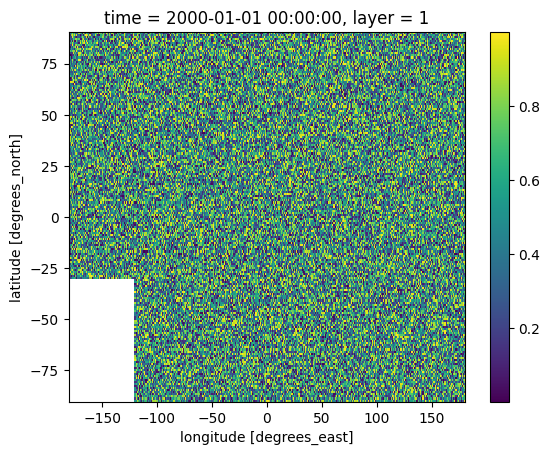

In [84]:
forcing.isel(time=0, layer=0).plot()

In [85]:
# mask = np.full((int(forcing.latitude.size), int(forcing.longitude.size)), 0, dtype=int)
# mask[:, 90:180] = 1
# mask[:, 180:270] = 2
# mask[:, 270:] = 3

In [96]:
def landmask_from_nan(forcing : xr.DataArray):
    mask = forcing.isel(time=0).notnull().reset_coords("time", drop=True)
    mask.name = "mask"
    mask.attrs = {
        "long_name": "mask",
        "flag_values": [0, 1],
        "flag_meanings": "0: land, 1: ocean",
    }
    return mask

In [97]:
mask = landmask_from_nan(forcing)
mask

<xarray.DataArray 'mask' (latitude: 181, longitude: 361, layer: 3)> Size: 196kB
array([[[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
...
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]]])
Coordinates:
  * latitude   (latitude) int64 1kB -90 -89 -88 -87 -86 -85 ... 86 87 88 89 90
  * longitude  (longitude) int64 3kB -180 -179 -178 -177 ... 177 178 179 180
  * layer      (layer) int64 24B 1 2 3
Attributes:
    long_name:    mask
    flag_values:  [0, 1]
    description:  0: land, 1: ocean

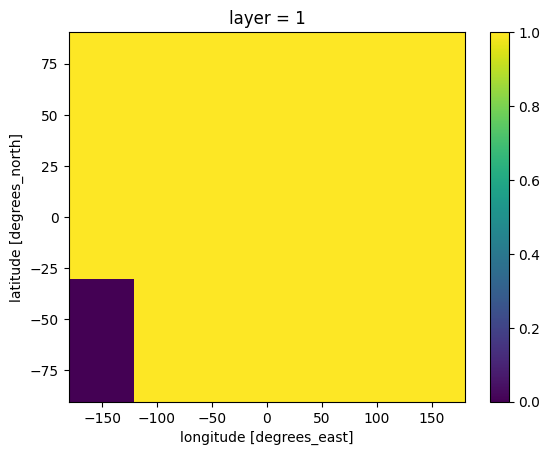

In [95]:
mask.isel(layer=0).plot()